In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Avinash\Desktop\Projects\P2=Mushroom\mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


As all of the data is in characters so we hwve to convert them in numeric data and also we are going to scale our data

In [16]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
df.shape

(8124, 23)

# Preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [7]:
mapping=list()
encoder=LabelEncoder()
for col in range(len(df.columns)):
    df[df.columns[col]]=encoder.fit_transform(df[df.columns[col]])
    map_dict={index:label for index,label in enumerate(encoder.classes_)}
    mapping.append(map_dict)

In [8]:
mapping

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

There is only one element in veil type so we can drop it

In [25]:
df=df.drop("veil-type",axis=1)

In [26]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


So here we are trying to predict class i.e. 1=poisonous 0=edable

In [10]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

So nothing is missing

<AxesSubplot:xlabel='class', ylabel='count'>

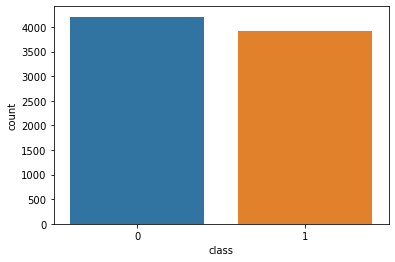

In [43]:
sn.countplot(df["class"])

The data is Almost balanced

# Univariant analysis

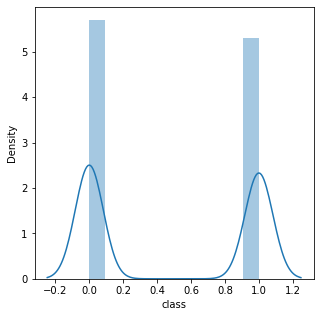

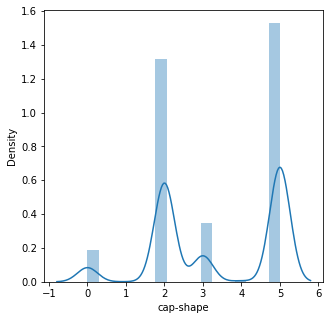

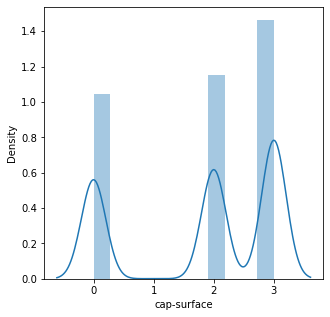

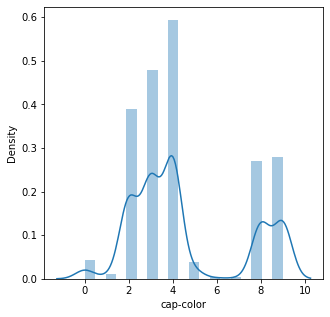

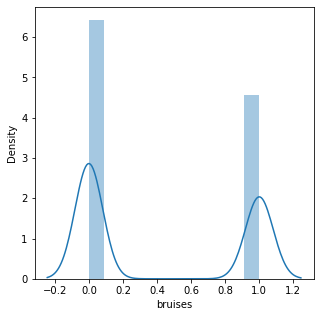

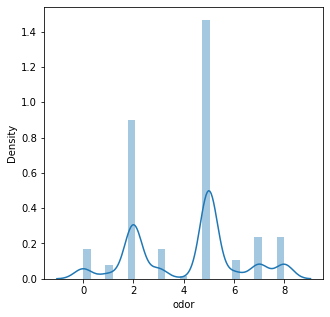

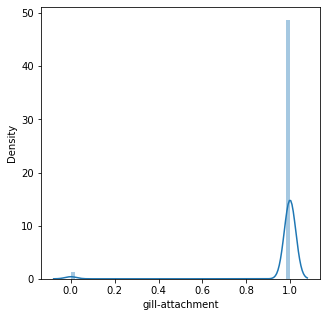

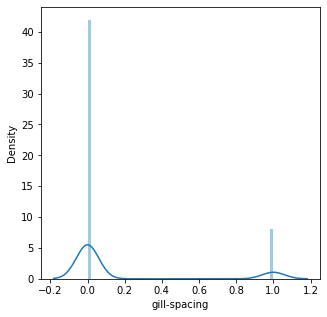

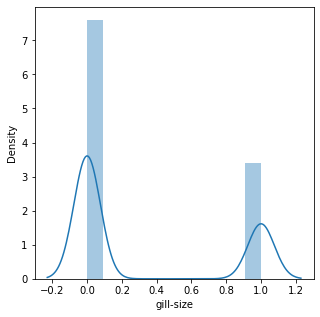

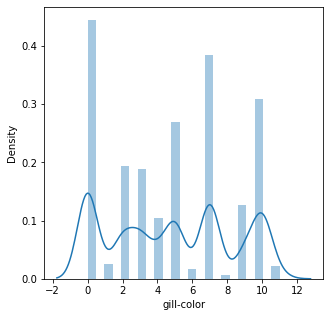

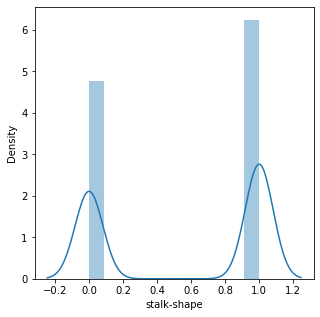

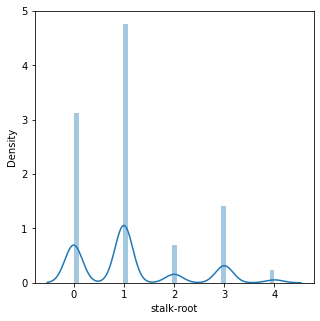

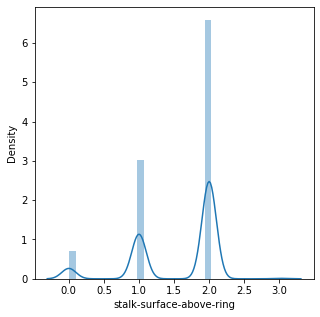

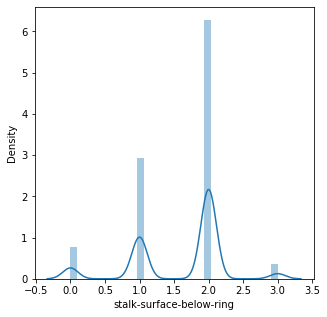

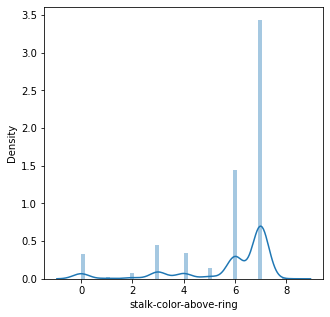

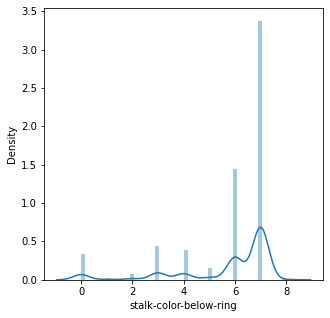

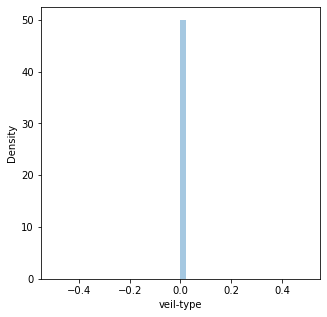

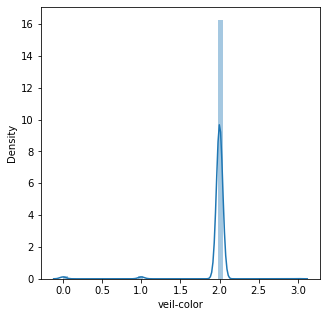

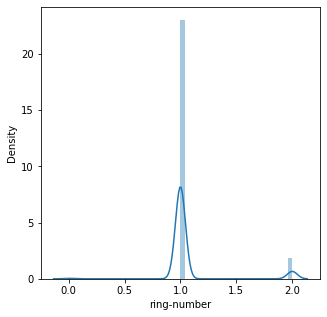

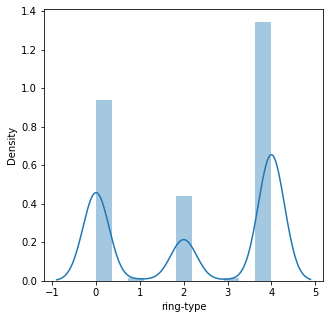

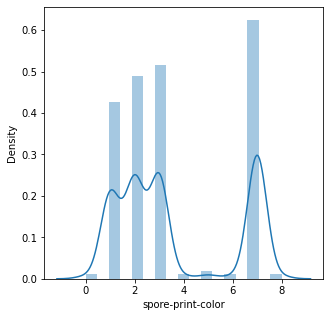

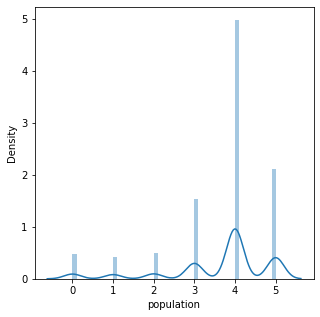

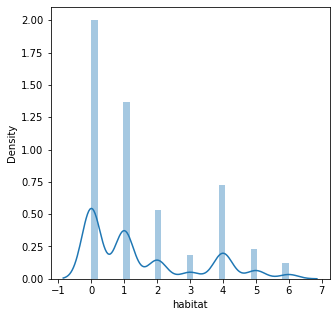

In [12]:
for column in df:
        plt.figure(figsize=(5,5))
        sn.distplot(df[column])

Nothing is normally distributed

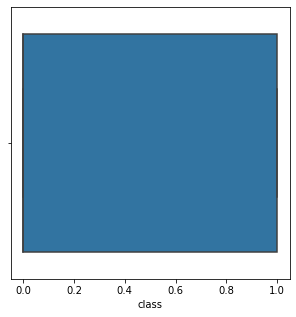

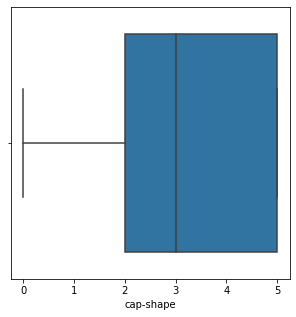

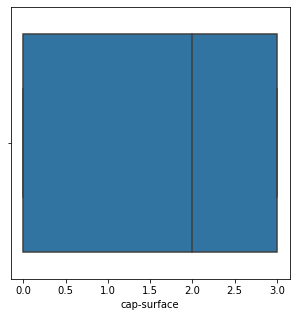

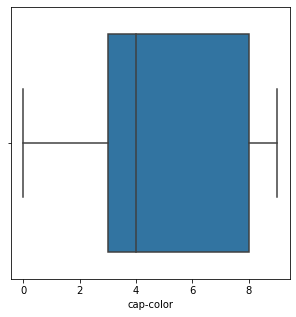

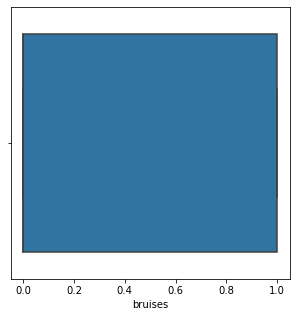

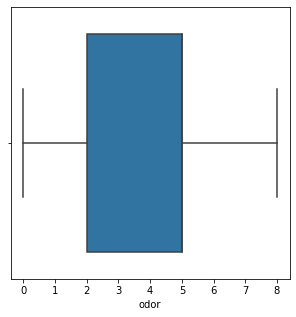

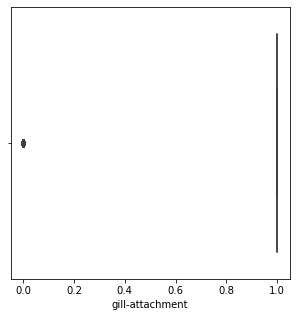

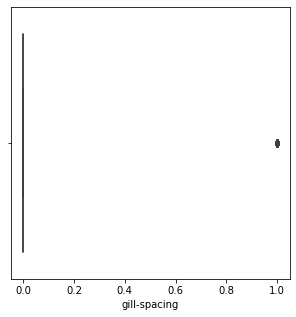

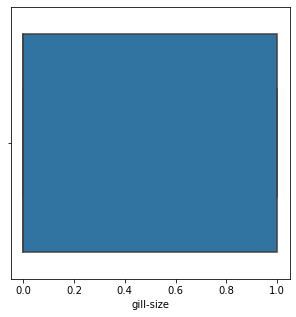

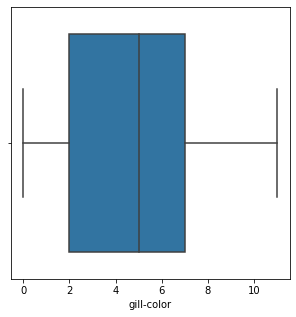

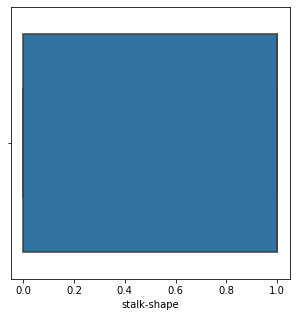

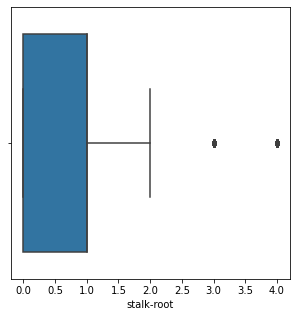

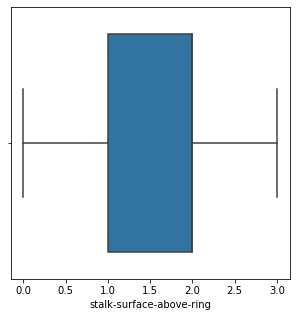

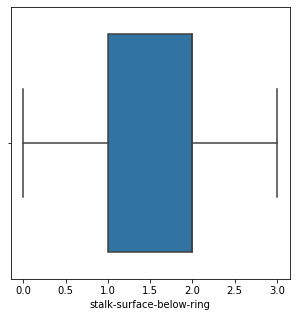

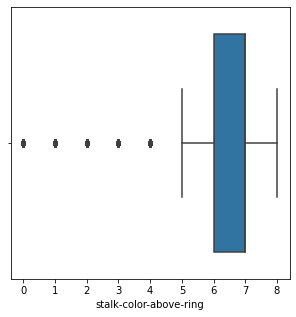

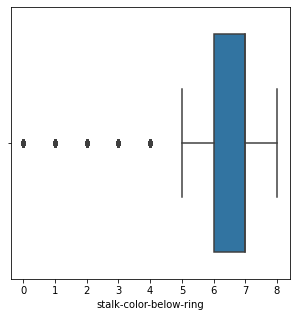

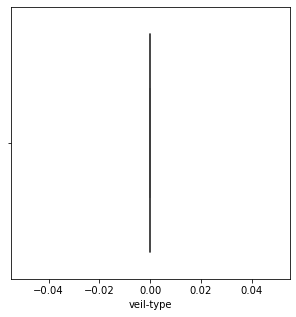

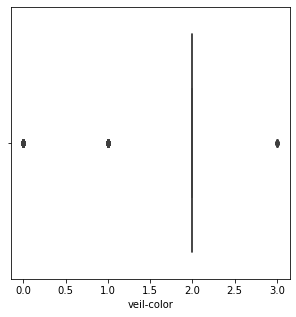

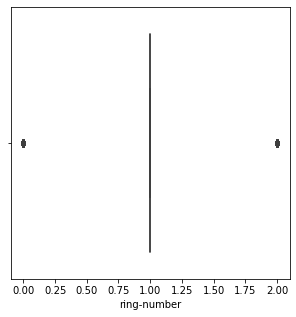

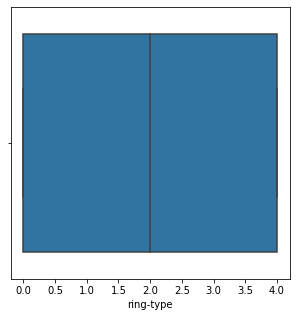

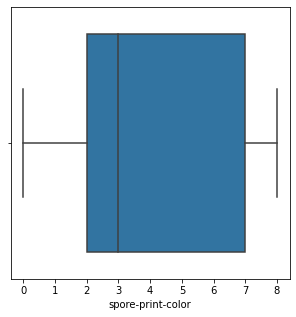

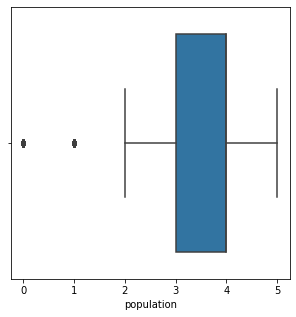

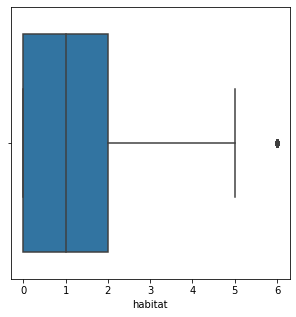

In [14]:
for column in df:
        plt.figure(figsize=(5,5))
        sn.boxplot(data=df, x=column)

abnormal graphs

# BI VARIANT ANALYSIS

In [28]:
cor=df.corr()

In [29]:
cor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


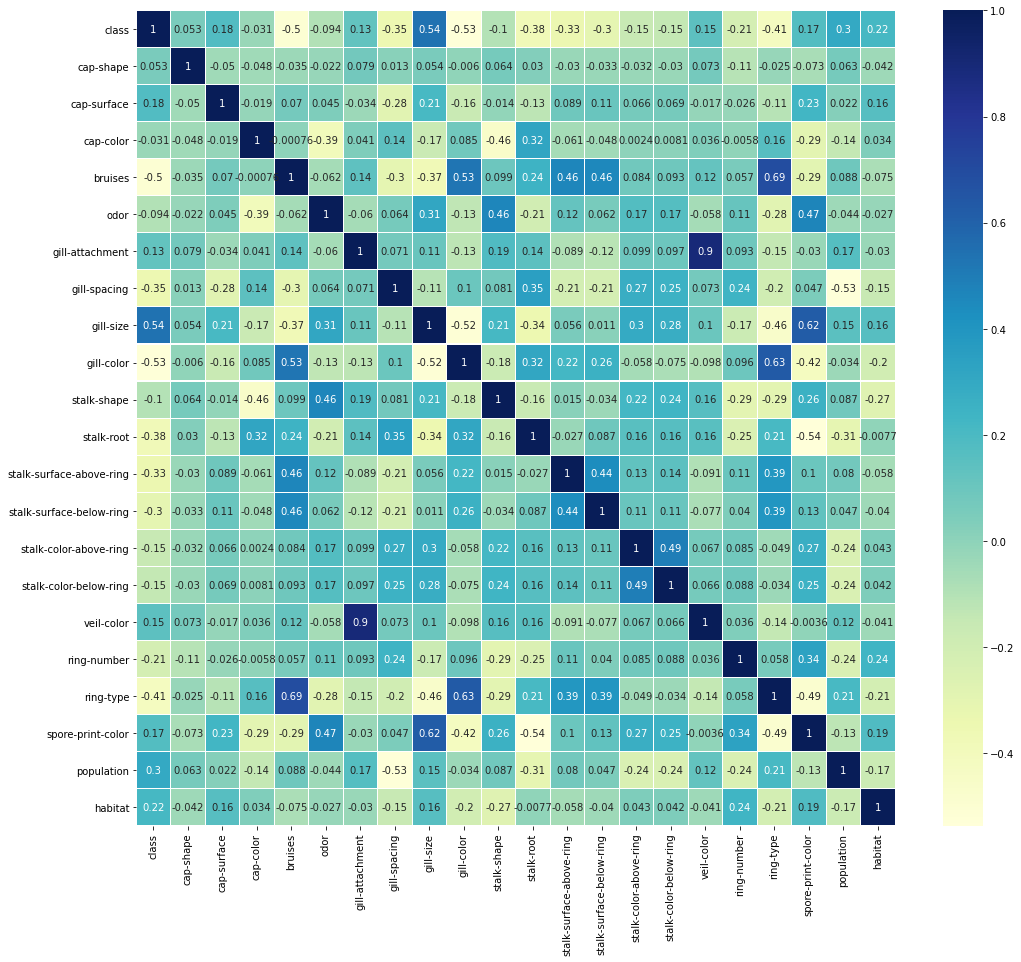

In [48]:
plt.figure(figsize=(17,15))
sn.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

Usually the least correlating variable is the most important one for classification. 

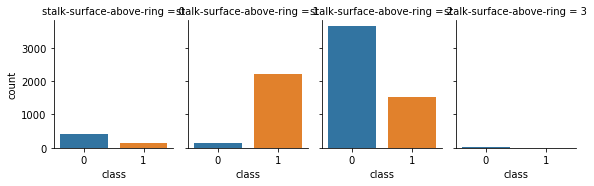

In [55]:
new_var=df[['class', 'stalk-surface-above-ring']]
sn.factorplot('class', col='stalk-surface-above-ring', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4)

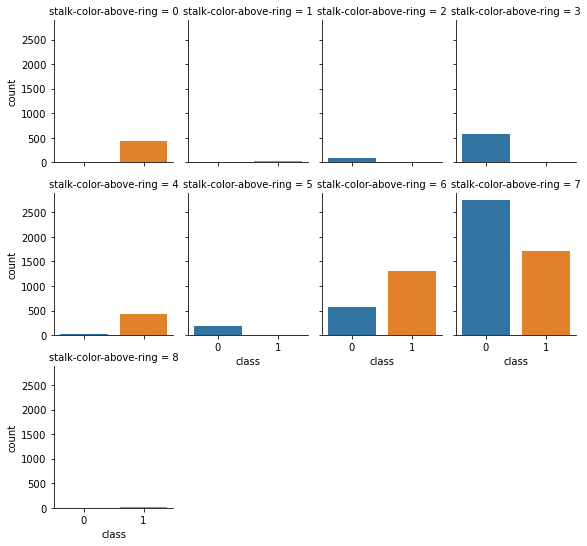

In [56]:
new_var=df[['class', 'stalk-color-above-ring']]
sn.factorplot('class', col='stalk-color-above-ring', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4)

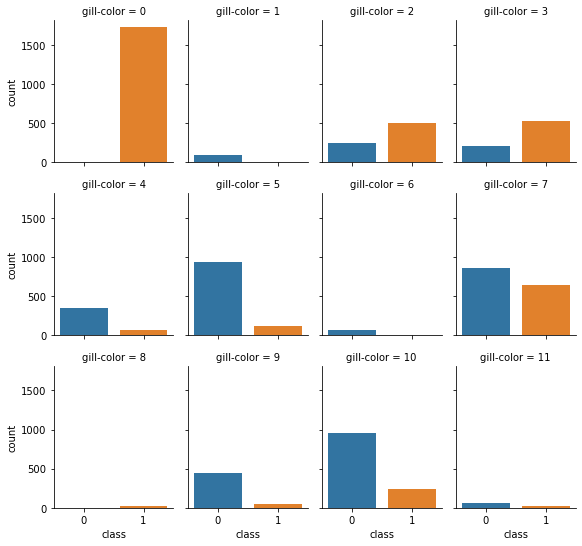

In [54]:
new_var=df[['class', 'gill-color']]
sn.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4)

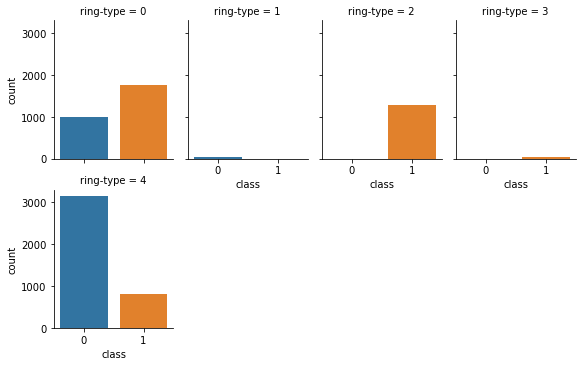

In [53]:
new_var=df[['class', 'ring-type']]
sn.factorplot('class', col='ring-type', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4)

# Removing outliers

In [38]:
from scipy.stats import zscore

In [40]:
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [41]:
new_df.shape

(6568, 22)

Here the data loss is high so we do not remove outliers

# Skewness

In [42]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

cap-color,gill-attachment,gill-spacing,gill-size,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,population ,habitat have skewness

This data is not even closly resembles to be a bell curve so skewness removal is not benifitial here.

# Splitting the data into x and y

In [59]:
from sklearn.model_selection import train_test_split

In [68]:
x=df.drop("class",axis=1)

In [69]:
y=df["class"]

# Scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [71]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,0.0,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
1,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,0.0,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,0.0,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,0.0,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
4,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,1.0,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,0.0,0.375,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.6,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,0.0,...,0.666667,0.666667,0.625,0.625,0.333333,0.5,1.0,0.000,0.2,0.333333
8120,1.0,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,0.0,...,0.666667,0.666667,0.625,0.625,0.000000,0.5,1.0,0.000,0.8,0.333333
8121,0.4,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,0.454545,0.0,...,0.666667,0.666667,0.625,0.625,0.333333,0.5,1.0,0.000,0.2,0.333333
8122,0.6,1.000000,0.444444,0.0,1.000,1.0,0.0,1.0,0.000000,1.0,...,0.666667,0.333333,0.875,0.875,0.666667,0.5,0.0,0.875,0.8,0.333333


We do not need to scale y as it is our target value

# Splitting the train test data

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.8,random_state=343)

# Training Models

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [117]:
ms=[]

# DesitionTree

In [118]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [119]:
ms.append(clf.score(X_test,Y_test))
clf.score(X_test,Y_test)

0.9978899243889573

# Ridge Classifier

In [120]:
clf2 = RidgeClassifier()
clf2 = clf2.fit(X_train, Y_train)

In [121]:
ms.append(clf2.score(X_test,Y_test))
clf2.score(X_test,Y_test)

0.9426762792333392

# Random Forest

In [122]:
clf3= RandomForestClassifier()
clf3 = clf3.fit(X_train, Y_train)

In [123]:
ms.append(clf3.score(X_test,Y_test))
clf3.score(X_test,Y_test)

1.0

# KNN

In [124]:
clf4= RandomForestClassifier()
clf4 = clf4.fit(X_train, Y_train)

In [125]:
ms.append(clf4.score(X_test,Y_test))
clf4.score(X_test,Y_test)

1.0

# Cross Validation Score

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
cv=[]

In [128]:
temp=cross_val_score(clf,x,y,cv=5).mean()
cv.append(temp)
temp

0.9660253126184161

In [129]:
temp=cross_val_score(clf2,x,y,cv=5).mean()
cv.append(temp)
temp

0.8352813186813186

In [130]:
temp=cross_val_score(clf3,x,y,cv=5).mean()
cv.append(temp)
temp

0.8927533914361501

In [131]:
temp=cross_val_score(clf4,x,y,cv=5).mean()
cv.append(temp)
temp

0.8949701402046231

# Creating the matrix of model scores and CV scores

In [132]:
print(cv)

[0.9660253126184161, 0.8352813186813186, 0.8927533914361501, 0.8949701402046231]


In [133]:
print(ms)

[0.9978899243889573, 0.9426762792333392, 1.0, 1.0]


In [135]:
result=[]
for i in range(4):
    result.append(abs((cv[i])-(ms[i])))

In [136]:
result

[0.03186461177054123,
 0.10739496055202058,
 0.10724660856384993,
 0.10502985979537693]

So from here the value closest to zero is for Desition Tree classifier.Hence, Desition Tree classifier is our Best Model and its Accuracy score is 0.9978899243889573 i.e. 99%

# Evaluating model performance

In [144]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [145]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [146]:
print(accuracy_score(Y_train, y_train_pred))
confusion_matrix(Y_train, y_train_pred)

1.0


array([[1282,    0],
       [   0, 1155]], dtype=int64)

Our accuracy is 1 i.e. 100%

# Hyper Parameter Tuning

We do not need this as our accuracy is 100%

# Finally Saving our model

In [154]:
import joblib
joblib.dump(clf,r"C:\Users\Avinash\Desktop\Projects\P2=Mushroom\mushroom.pkl")

['C:\\Users\\Avinash\\Desktop\\Projects\\P2=Mushroom\\mushroom.pkl']